In [ ]:
import pandas as pd
import nltk

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
import string
import re
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')  



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Balong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Balong\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Balong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Balong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Balong\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df = pd.read_csv('reddit_data.csv')

df.head(10)

,subreddit,year,month,text,created_utc
0,callofduty,2020,6,Well said. [Cod],2020-06-15 23:56:34
1,callofduty,2020,9,[MW] Perfection,2020-09-19 21:08:24
2,callofduty,2020,6,They get no mercy [MW2],2020-06-17 18:16:03
3,callofduty,2020,7,[COD] Only OGs remember,2020-07-27 17:04:09
4,callofduty,2020,8,[MW] Campwarfare,2020-08-03 11:25:22
5,callofduty,2020,12,[COD] So accurate,2020-12-13 23:16:44
6,callofduty,2020,4,[MW2] Most Satisfaction I Ever Had!!,2020-04-03 13:42:43
7,callofduty,2020,8,[MW2] ah yes,2020-08-13 04:53:05
8,callofduty,2020,10,[MW2] The Last Thing Generald Sheperd Ever Saw,2020-10-09 16:16:25
9,callofduty,2020,10,[MW2] Stolen on Twitter,2020-10-04 11:31:59


In [ ]:
clean_df = df.dropna(subset=['text']) 


In [ ]:
def lowercase(x): 
    return " ".join(x.lower() for x in x.split()) 

clean_df['text'] = clean_df['text'].apply(lowercase)
clean_df.head(10) 


,subreddit,year,month,text,created_utc
0,callofduty,2020,6,well said. [cod],2020-06-15 23:56:34
1,callofduty,2020,9,[mw] perfection,2020-09-19 21:08:24
2,callofduty,2020,6,they get no mercy [mw2],2020-06-17 18:16:03
3,callofduty,2020,7,[cod] only ogs remember,2020-07-27 17:04:09
4,callofduty,2020,8,[mw] campwarfare,2020-08-03 11:25:22
5,callofduty,2020,12,[cod] so accurate,2020-12-13 23:16:44
6,callofduty,2020,4,[mw2] most satisfaction i ever had!!,2020-04-03 13:42:43
7,callofduty,2020,8,[mw2] ah yes,2020-08-13 04:53:05
8,callofduty,2020,10,[mw2] the last thing generald sheperd ever saw,2020-10-09 16:16:25
9,callofduty,2020,10,[mw2] stolen on twitter,2020-10-04 11:31:59


In [ ]:
clean_df['text'] = clean_df['text'].str.replace('[^\w\s]', "", regex = True) 
clean_df.head(5) 


<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Balong\AppData\Local\Temp\ipykernel_2552\2333621489.py:1: SyntaxWarning: invalid escape sequence '\w'
  clean_df['text'] = clean_df['text'].str.replace('[^\w\s]', "", regex = True)


,subreddit,year,month,text,created_utc
0,callofduty,2020,6,well said cod,2020-06-15 23:56:34
1,callofduty,2020,9,mw perfection,2020-09-19 21:08:24
2,callofduty,2020,6,they get no mercy mw2,2020-06-17 18:16:03
3,callofduty,2020,7,cod only ogs remember,2020-07-27 17:04:09
4,callofduty,2020,8,mw campwarfare,2020-08-03 11:25:22


In [ ]:
def deEmojify(x):
    emoji_pattern = re.compile("[" 
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002700-\U000027BF"  
        u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', str(x))

clean_df['text'] = clean_df['text'].apply(deEmojify)

In [ ]:
stop = stopwords.words('english') 

def replace_stopwords(x): 
    x = " ".join(x for x in x.split() if x not in stop) 
    return x 

clean_df['text'] = clean_df['text'].apply(replace_stopwords) 
clean_df.head(10) 


,subreddit,year,month,text,created_utc
0,callofduty,2020,6,well said cod,2020-06-15 23:56:34
1,callofduty,2020,9,mw perfection,2020-09-19 21:08:24
2,callofduty,2020,6,get mercy mw2,2020-06-17 18:16:03
3,callofduty,2020,7,cod ogs remember,2020-07-27 17:04:09
4,callofduty,2020,8,mw campwarfare,2020-08-03 11:25:22
5,callofduty,2020,12,cod accurate,2020-12-13 23:16:44
6,callofduty,2020,4,mw2 satisfaction ever,2020-04-03 13:42:43
7,callofduty,2020,8,mw2 ah yes,2020-08-13 04:53:05
8,callofduty,2020,10,mw2 last thing generald sheperd ever saw,2020-10-09 16:16:25
9,callofduty,2020,10,mw2 stolen twitter,2020-10-04 11:31:59


In [ ]:
wnl = WordNetLemmatizer()

def lemmatize_with_pos(text):
    return ' '.join([
        wnl.lemmatize(w, p[0].lower()) if p[0].lower() in ['a','n','v']
        else wnl.lemmatize(w)
        for w, p in pos_tag(word_tokenize(text))
    ])
clean_df['text'] = clean_df['text'].apply(lemmatize_with_pos)

In [ ]:
clean_df.head(50)

,subreddit,year,month,text,created_utc
0,callofduty,2020,6,well say cod,2020-06-15 23:56:34
1,callofduty,2020,9,mw perfection,2020-09-19 21:08:24
2,callofduty,2020,6,get mercy mw2,2020-06-17 18:16:03
3,callofduty,2020,7,cod ogs remember,2020-07-27 17:04:09
4,callofduty,2020,8,mw campwarfare,2020-08-03 11:25:22
5,callofduty,2020,12,cod accurate,2020-12-13 23:16:44
6,callofduty,2020,4,mw2 satisfaction ever,2020-04-03 13:42:43
7,callofduty,2020,8,mw2 ah yes,2020-08-13 04:53:05
8,callofduty,2020,10,mw2 last thing generald sheperd ever saw,2020-10-09 16:16:25
9,callofduty,2020,10,mw2 steal twitter,2020-10-04 11:31:59


In [ ]:
before = len(clean_df)
clean_df = clean_df.drop_duplicates(subset='text').reset_index(drop=True)
after = len(clean_df)

print(f"Removed: {before - after}")

Removed: 1791


In [ ]:
clean_df.to_csv("preprocessed_redditData.csv", index=False, encoding='utf-8')

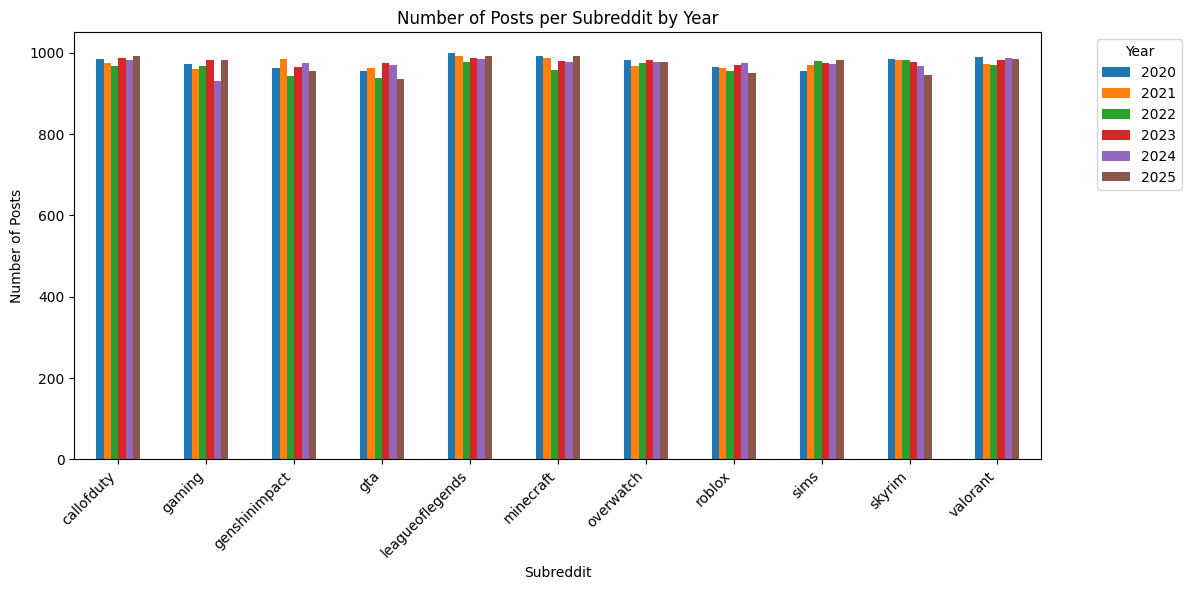

In [ ]:
grouped = clean_df.groupby(['subreddit', 'year']).size().unstack(fill_value=0)
ax = grouped.plot(kind='bar', figsize=(12, 6))

plt.title('Number of Posts per Subreddit by Year')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
print(grouped)

year             2020  2021  2022  2023  2024  2025
subreddit                                          
callofduty        984   975   967   988   981   991
gaming            973   960   968   981   931   983
genshinimpact     963   985   942   965   974   955
gta               955   962   938   975   970   935
leagueoflegends  1000   991   977   988   985   992
minecraft         991   986   958   979   978   991
overwatch         983   967   974   983   977   977
roblox            965   962   954   970   974   951
sims              954   970   979   975   972   981
skyrim            984   981   982   978   968   946
valorant          990   973   969   982   987   984
